# Zomato Data Analysis

In [3]:
# Import necessary Python libraries
    
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [7]:
# Load the files.

dataframe = pd.read_csv("Zomato data .csv")

print(dataframe)


                                                name online_order book_table  \
0                                              Jalsa          Yes        Yes   
1                                     Spice Elephant          Yes         No   
2                                    San Churro Cafe          Yes         No   
3                              Addhuri Udupi Bhojana           No         No   
4                                      Grand Village           No         No   
5                                    Timepass Dinner          Yes         No   
6    Rosewood International Hotel - Bar & Restaurant           No         No   
7                                             Onesta          Yes        Yes   
8                                     Penthouse Cafe          Yes         No   
9                                          Smacznego          Yes         No   
10                                      Village Café          Yes         No   
11                                      

In [10]:
# Let’s convert the data type of the “rate” column to float and remove the denominator.
  
def handleRate(value):

    value=str(value).split('/')

    value=value[0];

    return float(value)
 

dataframe['rate']=dataframe['rate'].apply(handleRate)

In [11]:
# Display the first 5 rows of the data

print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [12]:
# Display the last 5 rows of the data

print(dataframe.tail())

                 name online_order book_table  rate  votes  \
143  Melting Melodies           No         No   3.3      0   
144   New Indraprasta           No         No   3.3      0   
145      Anna Kuteera          Yes         No   4.0    771   
146            Darbar           No         No   3.0     98   
147     Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
143                          100          Dining  
144                          150          Dining  
145                          450          Dining  
146                          800          Dining  
147                          200          Dining  


In [13]:
# Describe the data

print(dataframe.describe())

             rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000


In [26]:
# Prints the list of column names of the dataset
dataframe.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [14]:
# To obtain a summary of the data frame, we use info

print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
name                           148 non-null object
online_order                   148 non-null object
book_table                     148 non-null object
rate                           148 non-null float64
votes                          148 non-null int64
approx_cost(for two people)    148 non-null int64
listed_in(type)                148 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


In [27]:
dataframe.shape

(148, 7)

In [29]:
# Displays the data types of each column
dataframe.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [15]:
# To find the NULL value

dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [16]:
dataframe.duplicated().sum()

0

In [30]:
# Shows the count of non-null values in the particular column

dataframe.count()

name                           148
online_order                   148
book_table                     148
rate                           148
votes                          148
approx_cost(for two people)    148
listed_in(type)                148
dtype: int64

In [35]:
# Display the unique values in the 'engine' column to identify distinct engine sizes
dataframe['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4])

In [52]:
#Grouping by multiple columns
#Aggregates the given column in the given dataframe
dataframe.groupby(['name','rate']).agg({'book_table':'max'})

,,book_table
name,rate,
360 Atoms Restaurant And Cafe,3.1,No
Aarush's Food Plaza,3.4,No
Addhuri Udupi Bhojana,3.7,No
Amma - Manae,3.1,No
Anna Kuteera,4.0,No
Annapooraneshwari Mess,3.7,No
Aramane Donne Biriyani,2.9,No
Atithi Point Ande Ka Funda,3.1,No
Ayda Persian Kitchen,3.7,No


In [53]:
# Displays the 'votes' column 
dataframe['votes'] 

0       775
1       787
2       918
3        88
4       166
5       286
6         8
7      2556
8       324
9       504
10      402
11      150
12      164
13      424
14      918
15       90
16      133
17      144
18       93
19       13
20       62
21      180
22       28
23       62
24       31
25       11
26       75
27        4
28       23
29      148
       ... 
118       0
119      30
120     201
121       7
122       6
123      17
124      25
125       0
126       0
127       8
128       0
129       0
130       0
131       0
132       0
133       0
134       0
135       0
136       0
137       0
138       0
139       0
140       0
141       0
142       0
143       0
144       0
145     771
146      98
147      47
Name: votes, Length: 148, dtype: int64

In [54]:
# Sort the dataset by the 'votes' column in ascending order
dataframe.sort_values(by='votes',ascending=True)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
113,Dharwad Line Bazaar Mishra Pedha,No,No,3.4,0,150,Dining
116,Wood Stove,No,No,3.4,0,150,Dining
115,Aarush's Food Plaza,No,No,3.4,0,200,Dining
114,Cake Bite,No,No,3.4,0,300,Dining
125,Soms Kitchen & Bakes,No,No,2.9,0,400,Dining
126,Banashankari Nati Style,No,No,2.9,0,350,Dining
110,Hari Super Sandwich,No,No,3.2,0,200,Dining
107,Coffee Shopee,No,No,3.4,0,250,Dining
72,Spicy Tandoor,No,No,4.1,0,150,Dining
75,Om Sri Vinayaka Chats,No,No,3.6,0,500,Dining


In [57]:
# Identifying rows where rating is greater than 3.0

rating=dataframe[dataframe['rate']>4]

# Displaying the rows

print(rating)

                                            name online_order book_table  \
0                                          Jalsa          Yes        Yes   
1                                 Spice Elephant          Yes         No   
7                                         Onesta          Yes        Yes   
9                                      Smacznego          Yes         No   
10                                  Village Café          Yes         No   
11                                  Cafe Shuffle          Yes        Yes   
12                              The Coffee Shack          Yes        Yes   
34                                        Faasos          Yes         No   
37                               Szechuan Dragon          Yes         No   
38                             Empire Restaurant          Yes         No   
44                                        Onesta          Yes        Yes   
51                              Shree Cool Point          Yes         No   
52          

Text(0.5, 0, 'Type of restaurant')

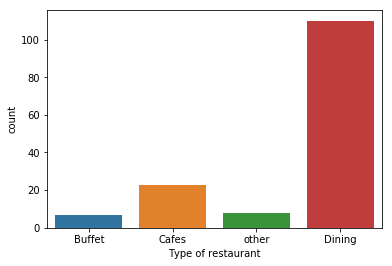

In [58]:
#Let’s explore the listed_in (type) column.

sns.countplot(x=dataframe['listed_in(type)'])

plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

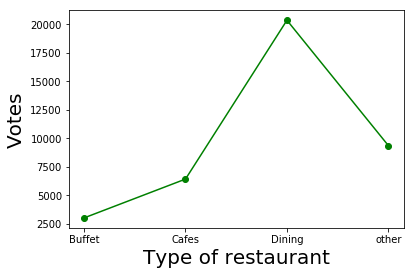

In [59]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()

result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, c="green", marker="o")

plt.xlabel("Type of restaurant", size=20)

plt.ylabel("Votes", size=20)

In [60]:
max_votes = dataframe['votes'].max()

restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")

print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


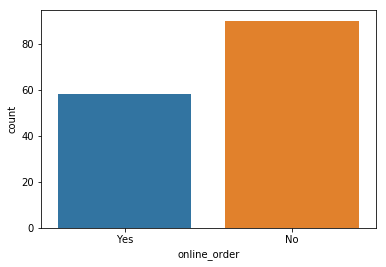

In [61]:
#Let’s explore the online_order column.

sns.countplot(x=dataframe['online_order'])

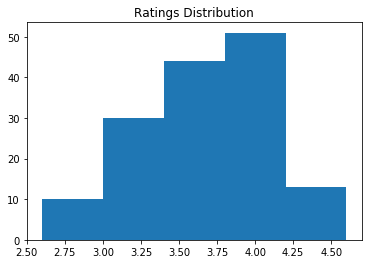

In [62]:
#Let’s explore the rate column.

plt.hist(dataframe['rate'],bins=5)

plt.title("Ratings Distribution")

plt.show()

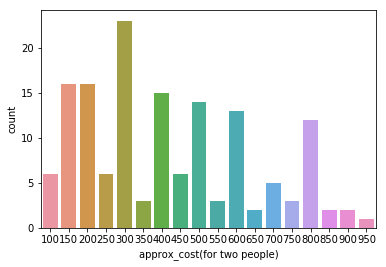

In [63]:
#Let’s explore the approx_cost(for two people) column.

couple_data=dataframe['approx_cost(for two people)']

sns.countplot(x=couple_data)

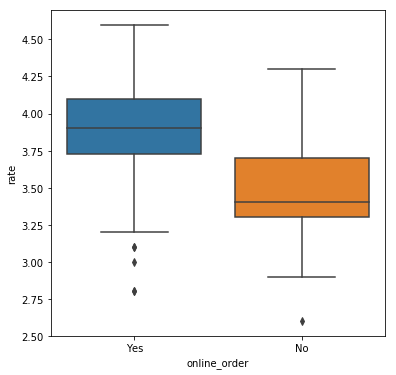

In [64]:
plt.figure(figsize = (6,6))

sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

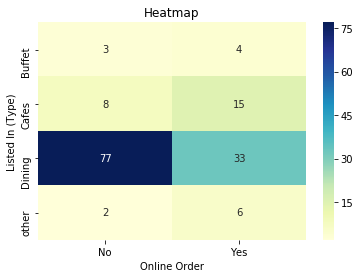

In [65]:
#pivot table

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

plt.title("Heatmap")

plt.xlabel("Online Order")

plt.ylabel("Listed In (Type)")

plt.show()